In [ ]:
#https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
#https://keras.io/examples/timeseries/timeseries_anomaly_detection/
#https://github.com/BLarzalere/LSTM-Autoencoder-for-Anomaly-Detection/blob/master/Sensor%20Anomaly%20Detection.ipynb

In [2]:
import pandas as pd
from tensorflow.keras.utils import get_file

In [3]:
filePath="/home/k/PycharmProjects/pythonProject/kerasOCR/siemensGomesa/results//"
modelPath="/home/k/PycharmProjects/pythonProject/kerasOCR/siemensGomesa/model//"
plotPath="/home/k/PycharmProjects/pythonProject/kerasOCR/siemensGomesa/plots//"

#fileName="df_6.csv"
fileName="df1.csv"


def readData():
    df1 = pd.read_csv(filePath + fileName)
    print("\n\t shape2:", df1.shape)
    return df1

df1=readData()
print("\n\t shape: df2:",df1.shape)



	 shape2: (106746, 3)

	 shape: df2: (106746, 3)


In [14]:

# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
#import sklearn.external.joblib as extjoblib
import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
from tensorflow.random import set_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers



In [15]:
seed(10)
set_seed(10)

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.05, shuffle=False)
print("\n\t train:",train.shape,"\t test:",test.shape)


	 train: (101408, 3) 	 test: (5338, 3)


In [19]:
print("\n\t column names:",train.columns)


	 column names: Index(['timeUTC', 'wind_speed', 'wind_direction'], dtype='object')


In [21]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train[['wind_speed', 'wind_direction']])
X_test = scaler.transform(test[['wind_speed', 'wind_direction']])
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [22]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (101408, 1, 2)
Test data shape: (5338, 1, 2)


In [24]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
    kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [25]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 2)              34    

In [32]:
# fit the model to the data
nb_epochs = 500
batch_size = 128
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,validation_split=0.05).history

Epoch 1/500
753/753 [==============================] - 5s 7ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 2/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 0.0292
Epoch 3/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 0.0297
Epoch 4/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0301
Epoch 5/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0300
Epoch 6/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0293
Epoch 7/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0298
Epoch 8/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 9/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0300
Epoch 10/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_lo

753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0300
Epoch 82/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 0.0294
Epoch 83/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0301
Epoch 84/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 85/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 86/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0293
Epoch 87/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0294
Epoch 88/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 0.0296
Epoch 89/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 0.0295
Epoch 90/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 

Epoch 161/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0296
Epoch 162/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0297
Epoch 163/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0300
Epoch 164/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0299
Epoch 165/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0295
Epoch 166/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 167/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 168/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 169/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 170/500
753/753 [==============================] - 5s 6ms/step - lo

753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0293
Epoch 241/500
753/753 [==============================] - 5s 7ms/step - loss: 0.0315 - val_loss: 0.0297
Epoch 242/500
753/753 [==============================] - 5s 7ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 243/500
753/753 [==============================] - 5s 7ms/step - loss: 0.0315 - val_loss: 0.0296
Epoch 244/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0297
Epoch 245/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0296
Epoch 246/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 247/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0296
Epoch 248/500
753/753 [==============================] - 5s 7ms/step - loss: 0.0317 - val_loss: 0.0294
Epoch 249/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - v

753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0296
Epoch 320/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0293
Epoch 321/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0292
Epoch 322/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 323/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0292
Epoch 324/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0317 - val_loss: 0.0294
Epoch 325/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0296
Epoch 326/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 327/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0299
Epoch 328/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - v

753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0299
Epoch 399/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0306
Epoch 400/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 401/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0301
Epoch 402/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0299
Epoch 403/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0298
Epoch 404/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0296
Epoch 405/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 406/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 407/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - v

753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0297
Epoch 478/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0296
Epoch 479/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0297
Epoch 480/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0297
Epoch 481/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0298
Epoch 482/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0296
Epoch 483/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0295
Epoch 484/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0315 - val_loss: 0.0299
Epoch 485/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - val_loss: 0.0293
Epoch 486/500
753/753 [==============================] - 5s 6ms/step - loss: 0.0316 - v

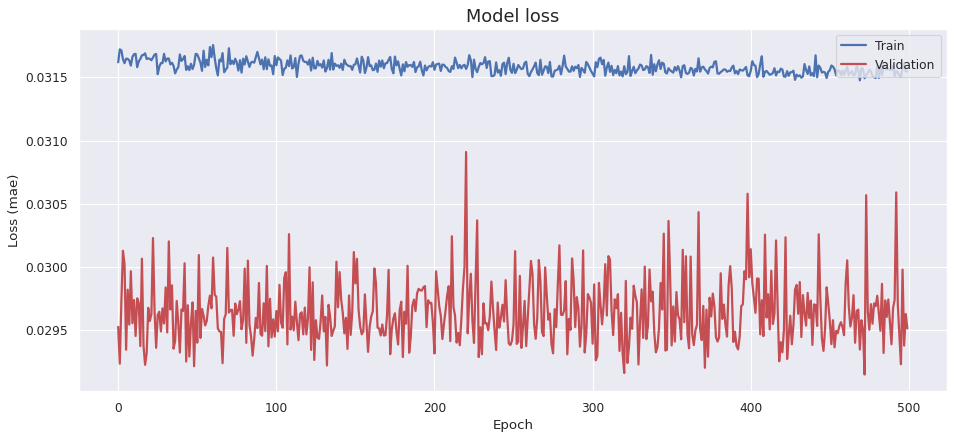

In [33]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

/home/k/anaconda3/envs/ocr/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

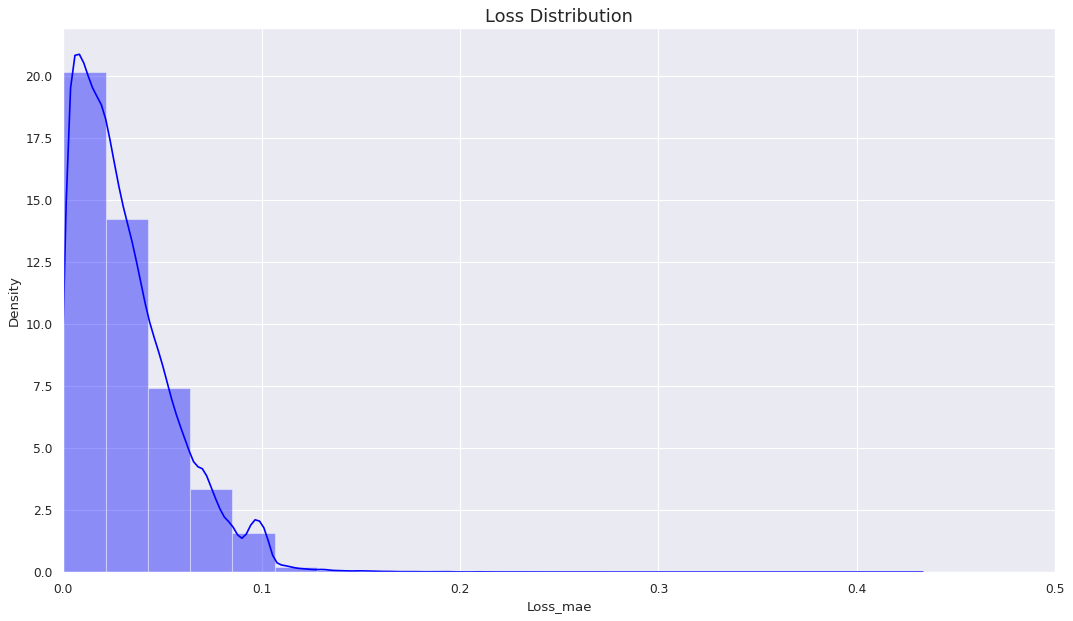

In [36]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
#X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred = pd.DataFrame(X_pred, columns=['wind_speed', 'wind_direction'])
X_pred.index = train.index
scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [46]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=['wind_speed', 'wind_direction'])
X_pred.index = test.index
scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.09
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
#scored['Anomaly1'] =  1 if scored['Loss_mae'] > scored['Threshold']
scored.head()
scored.to_csv(filePath+"scored.csv")

In [50]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.
shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=['wind_speed', 'wind_direction'])
X_pred_train.index = train.index
scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1
)
scored_train['Threshold'] = 0.09
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])
#scored.plot(logy=True, figsize=(16,9), color=['blue','red'])

<AxesSubplot:>

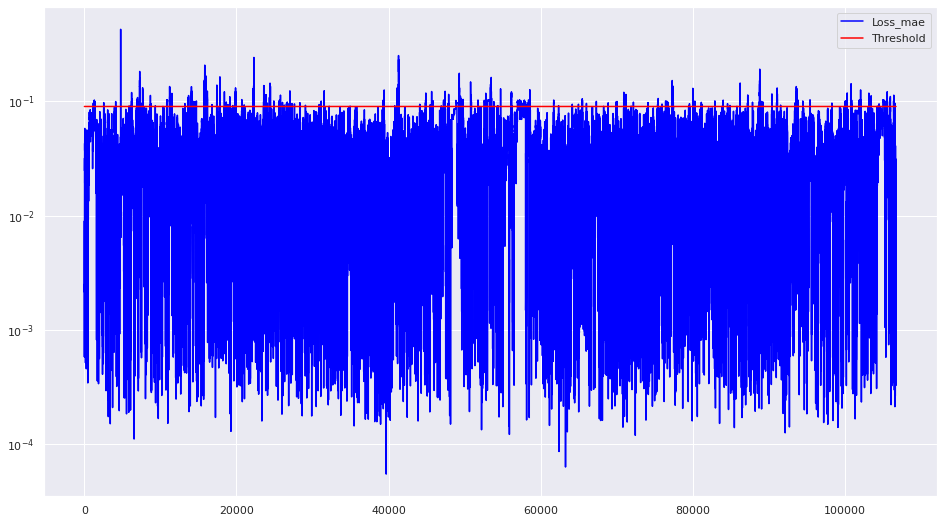

In [52]:

scored.plot(logy=True, figsize=(16,9), color=['blue','red'])

<AxesSubplot:>

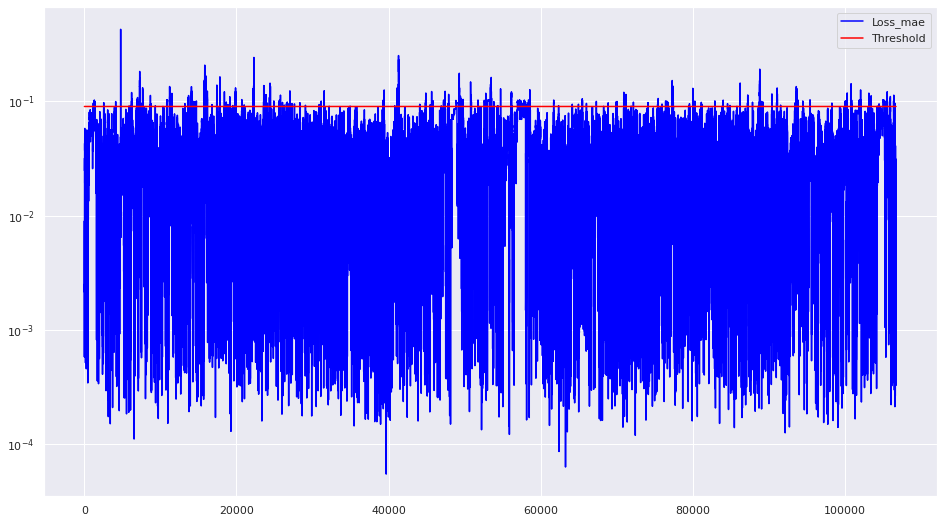

In [53]:
scored.plot(logy=True, figsize=(16,9), color=['blue','red'])

In [54]:
model.save("Cloud_model.h5")
print("Model saved")

Model saved


In [58]:
reconstructed_model = tf.keras.models.load_model("Cloud_model.h5")
reconstructed_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 2)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1216      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 2)              34    

In [64]:
X_pred_train2 = reconstructed_model.predict(X_train)

<AxesSubplot:>

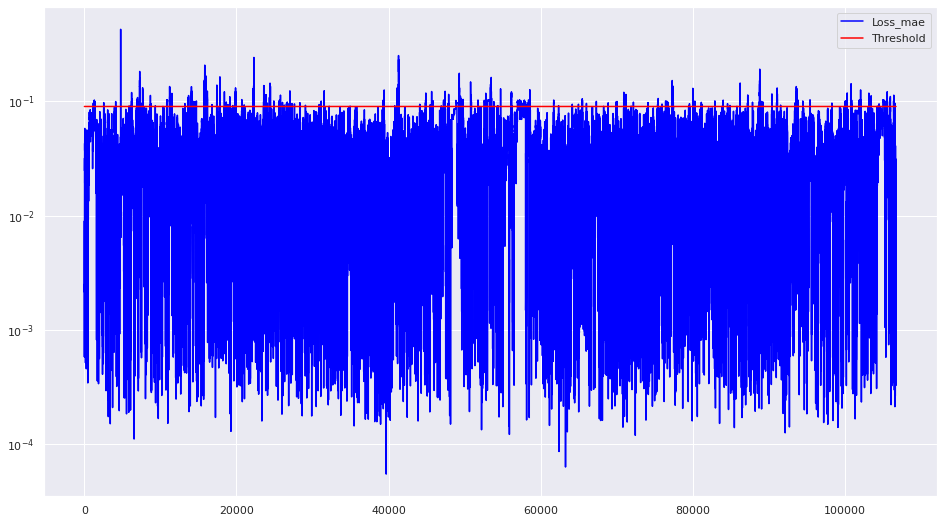

In [65]:
X_pred_train2 = X_pred_train2.reshape(X_pred_train2.shape[0], X_pred_train2.shape[2])
X_pred_train2 = pd.DataFrame(X_pred_train2, columns=['wind_speed', 'wind_direction'])
X_pred_train2.index = train.index
scored_train2 = pd.DataFrame(index=train.index)
scored_train2['Loss_mae'] = np.mean(np.abs(X_pred_train2-Xtrain), axis = 1)
scored_train2['Threshold'] = 0.09
scored_train2['Anomaly'] = scored_train2['Loss_mae'] > scored_train2['Threshold']
scored2 = pd.concat([scored_train2, scored])
scored.plot(logy=True, figsize=(16,9), color=['blue','red'])